In [1]:
import regex
import matplotlib

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
matplotlib.rcParams['figure.figsize'] = (16, 7)

In [3]:
df = pd.read_json("../../data/corpus.jsonl", lines=True)
df = df.set_index('_id').sort_index()
df.head()

,title,text,metadata
_id,,,
3,,"Nie mówię, że nie podoba mi się też pomysł szk...",{}
31,,Tak więc nic nie zapobiega fałszywym ocenom po...,{}
56,,Nigdy nie możesz korzystać z FSA dla indywidua...,{}
59,,Samsung stworzył LCD i inne technologie płaski...,{}
63,,Oto wymagania SEC: Federalne przepisy dotycząc...,{}


In [4]:
corpus = df['text']
corpus[3]

'Nie mówię, że nie podoba mi się też pomysł szkolenia w miejscu pracy, ale nie możesz oczekiwać, że firma to zrobi. Szkolenie pracowników to nie ich praca – oni tworzą oprogramowanie. Być może systemy edukacyjne w Stanach Zjednoczonych (lub ich studenci) powinny trochę martwić się o zdobycie umiejętności rynkowych w zamian za ich ogromne inwestycje w edukację, zamiast wychodzić z tysiącami zadłużonych studentów i narzekać, że nie są do niczego wykwalifikowani.'

In [30]:
time_regex = r"\b(?:(?:2[0-4])|(?:1?\d)):(?:[0-5]\d)(?::[0-5]\d)?"
# [\b] find word boundary
# (\d{1,2}:) 1 or 2 digits followed by :
# {1,2} 1 or 2 time
# (\d{2})? optional last group

months_regex = [
    # Mianownik + Dopełniacz + Miejscownik
    '(?:S|s)tycz(?:eń|nia|niu)',        # January
    '(?:L|l)ut(?:y|ego|ym)',            # February
    '(?:M|m)ar(?:zec|ca|cu)',           # March
    '(?:K|k)wie(?:cień|tnia|tniu)',     # April
    '(?:M|m)aj(?:a|u)?',                # May
    '(?:C|c)zerw(?:iec|ca|cu)',         # June
    '(?:L|l)ip(?:iec|ca|cu)',           # July
    '(?:S|s)ierp(?:ień|nia|niu)',       # August
    '(?:W|w)rze(?:sień|śnia|śniu)',     # September
    '(?:P|p)aździernik(?:a|u)?',        # October
    '(?:L|l)istopad(?:a|ie)?',          # November
    '(?:G|g)rud(?:zień|nia|niu)',         # December
]

day_regex = '(?:3[0-1]|[0-2]?\d)'
year_regex = '(?:2\d{3}|1?\d{1,3})'

date_regex = rf"{day_regex}\s(?:{'|'.join(months_regex)})(?:\s{year_regex}|\b)"

In [31]:
print(time_regex)

\b(?:(?:2[0-4])|(?:1?\d)):(?:[0-5]\d)(?::[0-5]\d)?


In [32]:
print(date_regex)

(?:3[0-1]|[0-2]?\d)\s(?:(?:S|s)tycz(?:eń|nia|niu)|(?:L|l)ut(?:y|ego|ym)|(?:M|m)ar(?:zec|ca|cu)|(?:K|k)wie(?:cień|tnia|tniu)|(?:M|m)aj(?:a|u)?|(?:C|c)zerw(?:iec|ca|cu)|(?:L|l)ip(?:iec|ca|cu)|(?:S|s)ierp(?:ień|nia|niu)|(?:W|w)rze(?:sień|śnia|śniu)|(?:P|p)aździernik(?:a|u)?|(?:L|l)istopad(?:a|ie)?|(?:G|g)rud(?:zień|nia|niu))(?:\s(?:2\d{3}|1?\d{1,3})|\b)


In [33]:
example = 25906

In [34]:
corpus[example]

'„Aby uniknąć szczypców, z góry stwierdzam, że ta odpowiedź dotyczy USA; Europejczycy, Azjaci, Kanadyjczycy itp. mogą mieć zupełnie inne systemy i zasady. Nie musisz się martwić, jeśli spłacisz wyciąg z karty kredytowej w pełna w dniu, w którym jest należna w odpowiednim czasie. Z drugiej strony, jeśli rutynowo utrzymujesz saldo z miesiąca na miesiąc lub bierzesz zaliczki gotówkowe, to dokonanie dowolnej płatności, którą chcesz dokonać w tym miesiącu, jak najszybciej pozwoli Ci zaoszczędzić więcej na finansach opłaty, niż kiedykolwiek mógłbyś zarobić na koncie oszczędnościowym. Ale jeśli spłacisz w całości saldo każdego miesiąca, bardzo uważnie przeczytaj drobnym drukiem, kiedy płatność jest wymagalna: może to oznaczać, że płatności otrzymane przed 17:00 będą być wysłane tego samego dnia, lub może powiedzieć przed godziną 15:00 lub przed godziną 19:00 czasu wschodniego, lub w południe PST itp. itd. Tak jak mówi JoeTaxpayer, jeśli możesz zapłacić on-line z gwarantowanym dniem za transak

In [35]:
regex.findall(time_regex, corpus[example])

['17:00', '15:00', '19:00']

In [36]:
grouping_regex = "|".join(["(" + x + ")" for x in months_regex])

In [37]:
example = 29306

In [38]:
corpus[example]

'Nie - w grę wchodzą dodatkowe czynniki. Należy pamiętać, że akcje wyemitowane przez firmę mogą ulec zmianie z różnych powodów (takich jak konwersja/umorzenie zamiennych papierów wartościowych, nabywanie uprawnień do ograniczonych akcji pracowniczych, konwersja opcji pracowniczych, programy skupu akcji pracowniczych, lokowanie akcji, wykupy akcji, fuzje, prawa poboru itp. .) więc zawsze warto sprawdzić ogłoszenia SEC dla firmy, jeśli chcesz uzyskać dokładną liczbę. Może również istnieć wiele klas akcji i uprzywilejowanych papierów wartościowych, które mają różne poziomy dywidend. W przypadku PFG złożyli 10 kw. w dniu 22 kwietnia 2015 r. i zauważyli, że mają w obrocie 294 385 885 akcji zwykłych. Zauważyli również, że za trzy miesiące zakończone 31 marca 2014 r. dywidendy były wypłacane zarówno akcjonariuszom zwykłym, jak i akcjonariuszom uprzywilejowanym oraz że były akcje uprzywilejowane serii A (3 miliony) i akcje uprzywilejowane serii B (10 milionów) oraz oświadczenie: W lutym W 2015

In [39]:
grouping_regex

'((?:S|s)tycz(?:eń|nia|niu))|((?:L|l)ut(?:y|ego|ym))|((?:M|m)ar(?:zec|ca|cu))|((?:K|k)wie(?:cień|tnia|tniu))|((?:M|m)aj(?:a|u)?)|((?:C|c)zerw(?:iec|ca|cu))|((?:L|l)ip(?:iec|ca|cu))|((?:S|s)ierp(?:ień|nia|niu))|((?:W|w)rze(?:sień|śnia|śniu))|((?:P|p)aździernik(?:a|u)?)|((?:L|l)istopad(?:a|ie)?)|((?:G|g)rud(?:zień|nia|niu))'

In [40]:
regex.findall(grouping_regex, 'luty')

[('', 'luty', '', '', '', '', '', '', '', '', '', '')]

In [41]:
regex.findall(grouping_regex, corpus[example])

[('', '', '', '', 'maj', '', '', '', '', '', '', ''),
 ('', '', '', 'kwietnia', '', '', '', '', '', '', '', ''),
 ('', '', '', '', 'maj', '', '', '', '', '', '', ''),
 ('', '', 'marca', '', '', '', '', '', '', '', '', ''),
 ('', 'luty', '', '', '', '', '', '', '', '', '', '')]

In [42]:
print(date_regex)

(?:3[0-1]|[0-2]?\d)\s(?:(?:S|s)tycz(?:eń|nia|niu)|(?:L|l)ut(?:y|ego|ym)|(?:M|m)ar(?:zec|ca|cu)|(?:K|k)wie(?:cień|tnia|tniu)|(?:M|m)aj(?:a|u)?|(?:C|c)zerw(?:iec|ca|cu)|(?:L|l)ip(?:iec|ca|cu)|(?:S|s)ierp(?:ień|nia|niu)|(?:W|w)rze(?:sień|śnia|śniu)|(?:P|p)aździernik(?:a|u)?|(?:L|l)istopad(?:a|ie)?|(?:G|g)rud(?:zień|nia|niu))(?:\s(?:2\d{3}|1?\d{1,3})|\b)


In [43]:
regex.findall(date_regex, corpus[example])

['22 kwietnia 2015', '31 marca 2014']

In [44]:
def hour_extractor(hit: str) -> int:
    """
    Format is either HH:MM:SS or HH:MM
    :param hit: Time regex match
    :return: hour as int
    """
    times = hit.split(":")
    assert len(times) == 2 or len(times) == 3, hit
    return int(times[0])

In [45]:
def month_extractor(hit: str) -> int:
    """

    :param hit: Date regex match
    :return: month as a int
    """
    # hit = hit.lower()
    # if "stycz" in hit:
    #     return 1
    # if "lut" in hit:
    #     return 2
    # if "mar" in hit:
    #     return 3
    # if "kwi" in hit:
    #     return 4
    # if "maj" in hit:
    #     return 5
    # if "czer" in hit:
    #     return 6
    # if "lip" in hit:
    #     return 7
    # if "sier" in hit:
    #     return 8
    # if "wrze" in hit:
    #     return 9
    # if "paźdz" in hit:
    #     return 10
    # if "listo" in hit:
    #     return 11
    # if "grudzie" in hit:
    #     return 12
    # raise RuntimeError(hit)
    grouping_regex = "|".join(["(" + x + ")" for x in months_regex])
    return [i for i, match in enumerate(regex.findall(grouping_regex, hit)[0]) if len(match) > 0][0] + 1

In [46]:
hours_str = [
    hour_extractor(match)
    for text in corpus
    for match in regex.findall(time_regex, text)
]

In [47]:
months_str = [
    month_extractor(match)
    for text in corpus
    for match in regex.findall(date_regex, text)
]

In [48]:
len(hours_str)

416

In [49]:
len(months_str)

1474

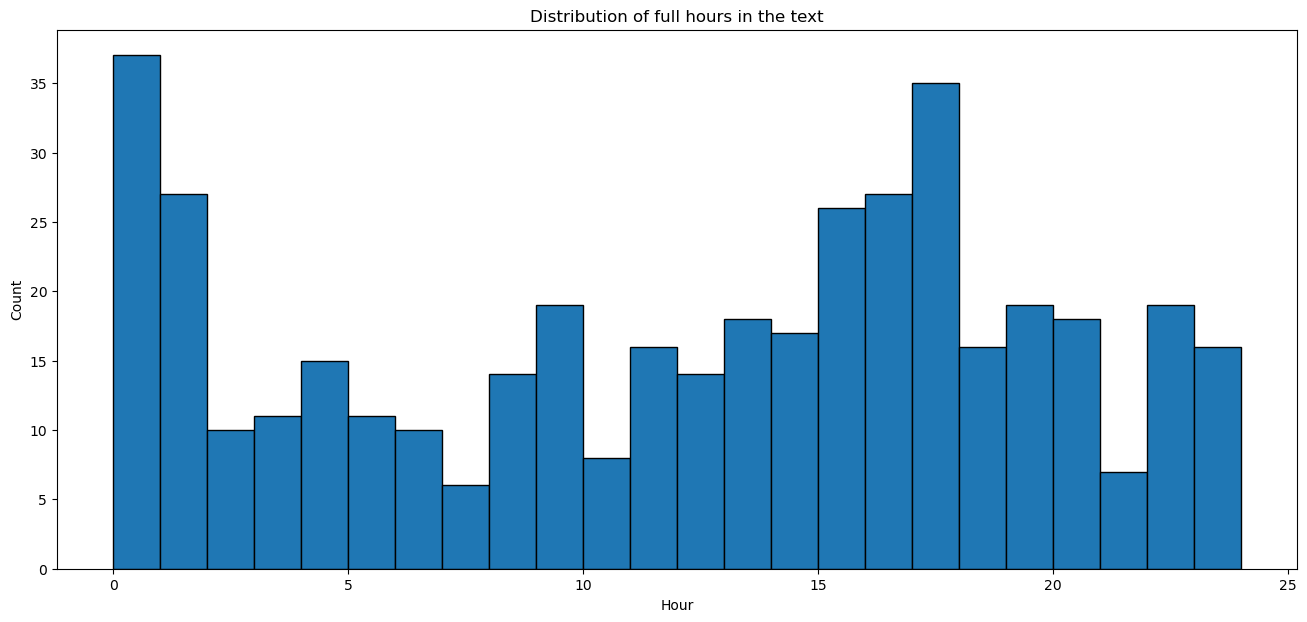

In [50]:
plt.hist(hours_str, edgecolor='black', bins=24)
plt.title('Distribution of full hours in the text')
plt.ylabel('Count')
plt.xlabel('Hour')
plt.savefig('pictures/hours_dist.svg')

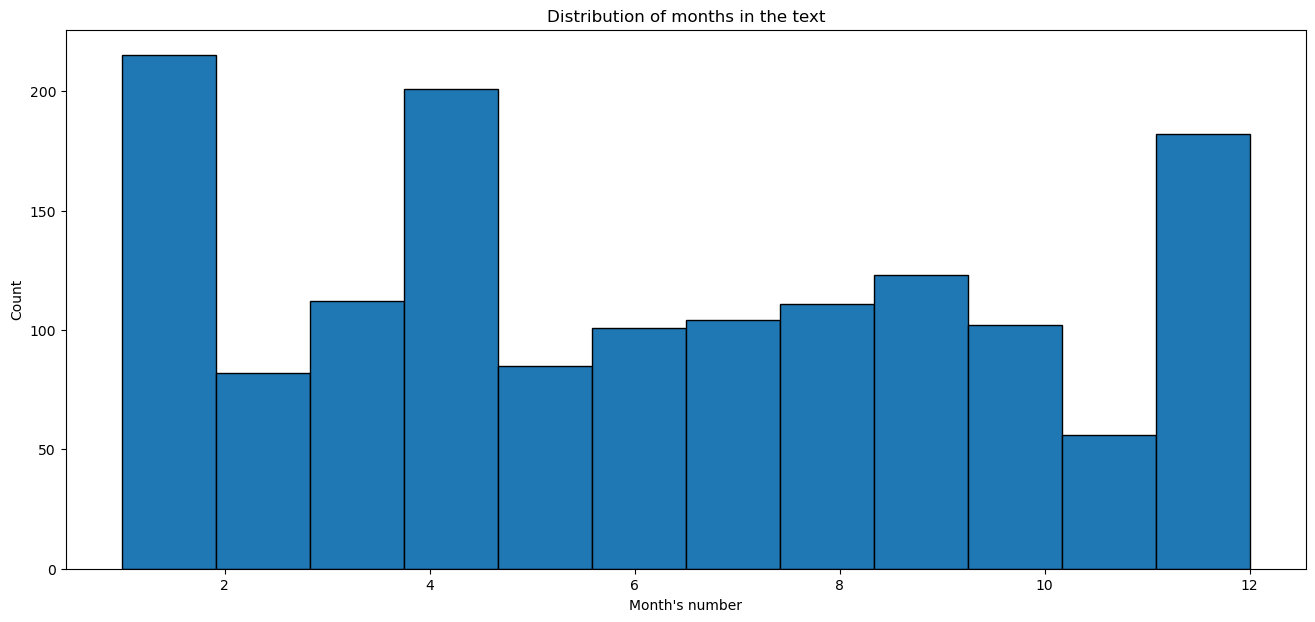

In [52]:
plt.hist(months_str, edgecolor='black', bins=12)
plt.title('Distribution of months in the text')
plt.ylabel('Count')
plt.xlabel("Month's number")
plt.savefig('pictures/months_dist.svg')

In [5]:
january_regex = r"stycz(?:eń|ni(?:owi|em|u|e|om|ami|ach|a|ów)?)"
sum(len(regex.findall(january_regex, text, regex.IGNORECASE)) for text in corpus)

955

In [6]:
number_with_january = rf"\d+\s{january_regex}"
sum(len(regex.findall(number_with_january, text, regex.IGNORECASE)) for text in corpus)

215

In [7]:
january_without_number = rf"(?<!\d+\s){january_regex}"
sum(len(regex.findall(january_without_number, text, regex.IGNORECASE)) for text in corpus)

740

It sums up :)

## Questions

---

1. Are regular expressions good at capturing times?

- They can handle regular times quite good, without any problems. But catching times in mixed or in verbal form might be problematic (like e.g. `po 20 wieczorem`)

2. Are regular expressions good at capturing dates?

- If we want to capture dates in standard numerical format (like `YYYY-MM-DD` or similar) they can be useful, but not in case of verbal notation. Especially for languages with declension (like Polish), they can be quite problematic, huge and unreadable

3. How one can be sure that the expression has matched all and only the correct expressions of a given type?

- If we're looking for standard data types in programming languages we can cast results to expected type, and no error should arise. Additionally, we can write unit tests for specific regex (or ask chat GPT for that :) )